# Funzioni matematiche Metodi Numerici

In [24]:
import numpy as np
import scipy
import matplotlib.pyplot as plt


### Steepest descent

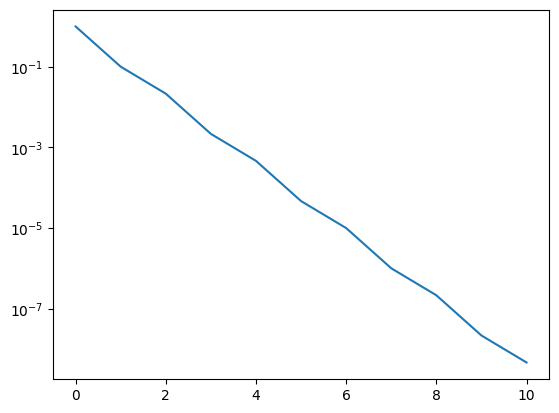

In [25]:
def steepestdescent(A, b, x0, itmax, toll):
    n, m = A.shape
    if n != m:
        print("Matrice non quadrata")
        return [], [], []
    x = x0
    r = A@x-b  # @ fa moltiplicazione fra matrici
    p = -r
    nb = np.linalg.norm(b)
    errore = np.linalg.norm(r)/nb
    vec_sol = []
    vec_sol.append(x)
    vec_err = []
    vec_err.append(errore)
    it = 0

    while errore >= toll and it <= itmax:
        it += 1
        Ap = A@p
        rTr = np.dot(r.T, r)
        # volendo si può fare anche come alpha = rTr/np.dot(r.T, A@r) come scritto nelle dispense della teoria
        alpha = rTr/np.dot(p.T, Ap)
        x = x+alpha*p
        vec_sol.append(x)
        r = r+alpha*Ap
        errore = np.linalg.norm(r)/nb
        vec_err.append(errore)
        p = -r

    return x, vec_err, vec_sol, it


# ora costruiamo matrice simmetrica e definita positiva
A = np.array([[8, 3], [3, 14]])
n = A.shape[0]
b = np.sum(A, axis=1).reshape(n, 1)
x0 = np.zeros_like(b)
itmax = 500  # valore forniti da prof in caso di esame
toll = 1e-08  # valore forniti da prof in caso di esame

# passo valori alla funzione
xG, vet_arrG, vec_solG, itG = steepestdescent(A, b, x0, itmax, toll)

# grafico
plt.semilogy(np.arange(itG+1), vet_arrG)


### Conjugate gradient

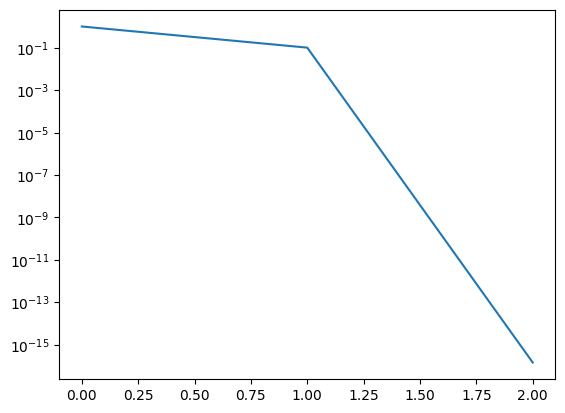

In [26]:
def conjugate_gradient(A, b, x0, itmax, toll):
    n, m = A.shape
    if n != m:
        print("Matrice non quadrata")
        return [], [], []
    x = x0
    r = A@x-b  # @ fa moltiplicazione fra matrici
    p = -r
    nb = np.linalg.norm(b)
    errore = np.linalg.norm(r)/nb
    vec_sol = []
    vec_sol.append(x)
    vec_err = []
    vec_err.append(errore)
    it = 0

    while errore >= toll and it <= itmax:
        it += 1
        Ap = A@p
        rTr = np.dot(r.T, r)
        alpha = rTr/np.dot(p.T, Ap)
        x = x+alpha*p
        vec_sol.append(x)
        r = r+alpha*Ap  # r successivo
        errore = np.linalg.norm(r)/nb
        vec_err.append(errore)
        gamma = np.dot(r.T, r) / rTr  # sfrutto rTr che ho già calcolato sopra
        p = -r + gamma*p

    return x, vec_err, vec_sol, it


# ora costruiamo matrice simmetrica e definita positiva
A = np.array([[8, 3], [3, 14]])
n = A.shape[0]
b = np.sum(A, axis=1).reshape(n, 1)
x0 = np.zeros_like(b)
itmax = 500  # valore forniti da prof in caso di esame
toll = 1e-08  # valore forniti da prof in caso di esame

# passo valori alla funzione
xG, vet_arrG, vec_solG, itG = conjugate_gradient(A, b, x0, itmax, toll)

# grafico
plt.semilogy(np.arange(itG+1), vet_arrG)


### Crea matrice di poisson

In [27]:
def crea_poisson(n):
    a1 = np.eye(n, n, k=0) * 4
    a2 = np.eye(n, n, k=-1) * (-1)
    a3 = np.eye(n, n, k=1) * (-1)
    a4 = np.eye(n, n, k=-3) * (-1)
    a5 = np.eye(n, n, k=3) * (-1)
    A = a1 + a2 + a3 + a4 + a5
    return A


### Jacobi

Raggio spettrale 0.5586853131416272
sol Jac 
 =  [[-2.10869567 -2.10869567  0.25853455]
 [ 2.41304346  2.41304346  0.36136553]
 [ 4.67391303  4.67391303  1.08118235]] 
 it Jac  82


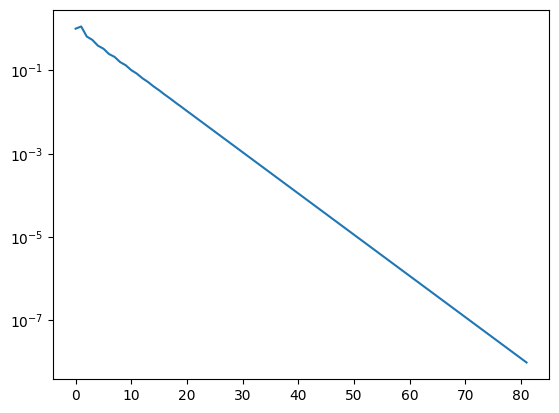

In [28]:
def jacobi(A, b, x0, toll, itmax):
    d = np.diag(A)
    D = np.diag(d)
    invM = np.diag(1/d)
    E = np.tril(A, -1)
    F = np.triu(A, 1)
    N = -(E+F)
    T = np.dot(invM, N)
    autovalori = np.linalg.eigvals(T)
    raggiospettrale = np.max(np.abs(autovalori))
    print("Raggio spettrale", raggiospettrale)
    errore = 1000
    it = 0
    er_vet = []
    while it <= itmax and errore >= toll:
        x = (b+np.dot(N, x0))/d
        errore = np.linalg.norm(x - x0) / np.linalg.norm(x)
        er_vet.append(errore)
        x0 = x.copy()  # importante perchè sennò uso sempre x0
        it += 1
    return x, it, er_vet


A = np.array([[4, 1, 3], [3, 4, 1], [1, 1, 17]])
n = A.shape[0]
b = np.sum(A, axis=1).reshape(n, 1)
x0 = np.zeros((n, 1))
toll = 1e-8
itmax = 100
sollJac, it_Jac, er_vet_Jac = jacobi(A, b, x0, toll, itmax)
print("sol Jac \n = ", sollJac, "\n it Jac ", it_Jac)
plt.semilogy(np.arange(it_Jac), er_vet_Jac)


### Norma infinito e norma uno (codificato da noi)

In [29]:
def norma_infinito(arr):
    sum = np.sum(np.abs(arr), axis=1)
    return np.max(sum)


def norma_uno(arr):
    sum = np.sum(np.abs(arr), axis=0)
    return np.max(sum)


### Norme con numpy

In [30]:
a = np.norm(A, np.inf)
b = np.norm(A, 1)
c = np.norm(A, 2)


AttributeError: module 'numpy' has no attribute 'norm'